In [1]:
import numpy as np # # Import the NumPy library with the alias 'np'
import pandas as pd # Import the Pandas library and assign it the alias 'pd'
import bz2  # Import the bz2 module for working with BZIP2-compressed files
import re # Importing the 're' module for regular expressions
import os # Importing the 'os' module for operating system-related functions
import gc # Importing the 'gc' module for garbage collection

import matplotlib.pyplot as plt  # Importing the 'matplotlib.pyplot' module for creating plots
import seaborn as sns # Importing the 'seaborn' library for enhancing data visualization

from nltk.corpus import stopwords # Importing the 'stopwords' corpus from NLTK (Natural Language Toolkit)
from nltk.classify import SklearnClassifier # Importing the 'SklearnClassifier' class from NLTK

In [2]:
# Using os.walk to recursively traverse through the directory 'D:\Dissertation'
for dirname, _, filenames in os.walk('D:\Dissertation'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # Print the absolute path of each file in the directory

# Using os.listdir to list the files and directories directly under 'D:\Dissertation'
print(os.listdir("D:\Dissertation"))

D:\Dissertation\test.ft.txt.bz2
D:\Dissertation\train.ft.txt.bz2
['test.ft.txt.bz2', 'train.ft.txt.bz2']


In [3]:
# Open Bzip2-compressed text files for reading.
# 'train.ft.txt.bz2' contains training data, and 'test.ft.txt.bz2' contains test data.
train_file = bz2.BZ2File('D:/Dissertation/train.ft.txt.bz2')
test_file = bz2.BZ2File('D:/Dissertation/test.ft.txt.bz2')

In [4]:
# Read the lines from the 'train_file' and store them in 'train_file_lines' as a list.
# Read the lines from the 'test_file' and store them in 'test_file_lines' as a list.
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

In [5]:
# Delete the file objects train_file and test_file to release system resources
# and trigger garbage collection to reclaim any memory associated with them.
del train_file, test_file
print (gc.collect())
print( type (gc.collect()))

0
<class 'int'>


In [6]:
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [7]:
print(type(train_file_lines), type(test_file_lines), "\n")

print("Train Data Volume:", len(train_file_lines), "\n")
print("Test Data Volume:", len(test_file_lines), "\n\n")

print("Demo: 1", "\n")
for x in train_file_lines[:1]:
    print(x, "\n")
    
print("Demo: 2", "\n")
for x in test_file_lines[:1]:
    print(x, "\n")    

<class 'list'> <class 'list'> 

Train Data Volume: 3600000 

Test Data Volume: 400000 


Demo: 1 

__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
 

Demo: 2 

__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no m

In [8]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]

In [9]:
train_labels[1]


1

In [10]:
test_labels[1]

1

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Labels distribution')

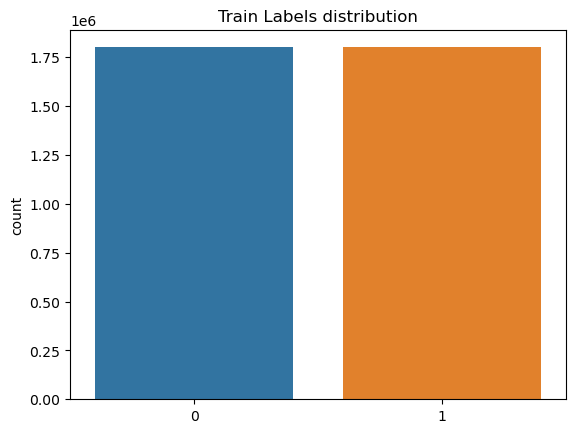

In [11]:
sns.countplot(train_labels)
plt.title('Train Labels distribution')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Test Labels distribution')

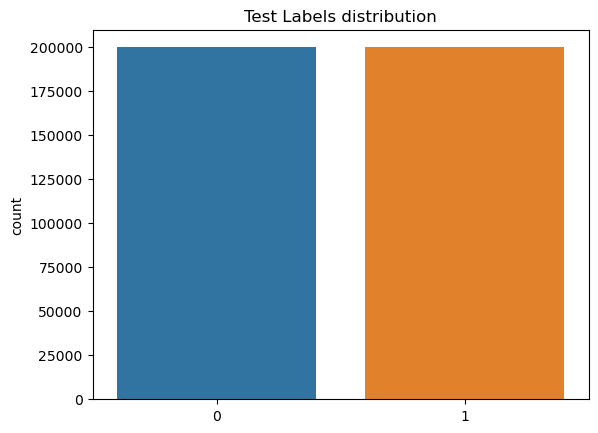

In [12]:
sns.countplot(test_labels)
plt.title('Test Labels distribution')

In [13]:
train_sentences = [x.split(' ', 1)[1][:-1] for x in train_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1] for x in test_file_lines]

In [14]:
train_sentences[1]

"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Word Frequency Distribution in Reviews for training data ')

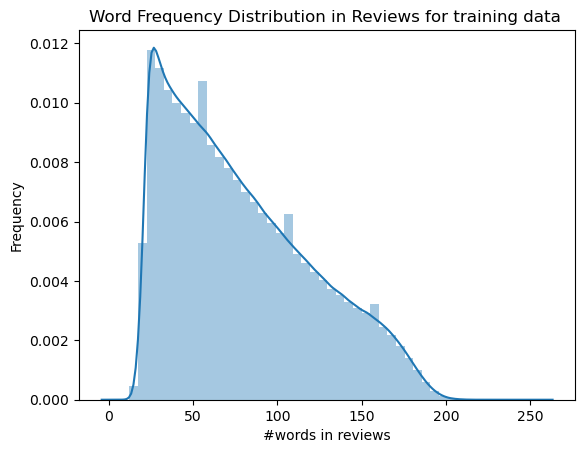

In [15]:
train_sentences_size = list(map(lambda x: len(x.split()), train_sentences))

sns.distplot(train_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution in Reviews for training data ")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Word Frequency Distribution in Reviews for testing data ')

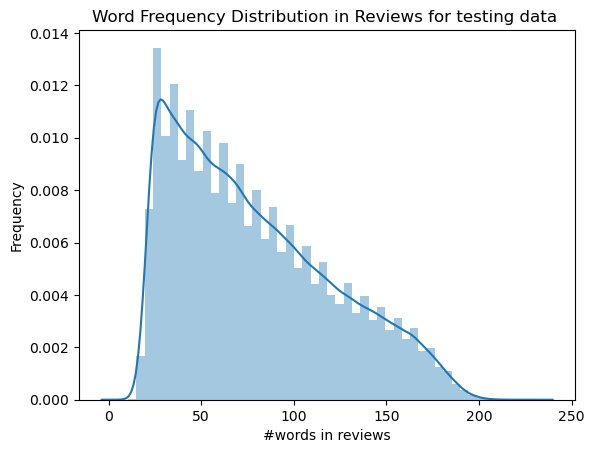

In [16]:
test_sentences_size = list(map(lambda x: len(x.split()), test_sentences))

sns.distplot(test_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution in Reviews for testing data ")

In [17]:
train_label_len = pd.DataFrame({"labels": train_labels, "len": train_sentences_size})
train_label_len.head()

,labels,len
0,1,80
1,1,97
2,1,129
3,1,118
4,1,87


In [18]:
test_label_len = pd.DataFrame({"labels": test_labels, "len": test_sentences_size})
test_label_len.head()

,labels,len
0,1,106
1,1,148
2,0,60
3,1,37
4,1,69


Negative mean length: 81.50
Positive mean length: 75.46
Mean Difference: 6.04


Text(0.5, 1.0, 'Review Size Categorization')

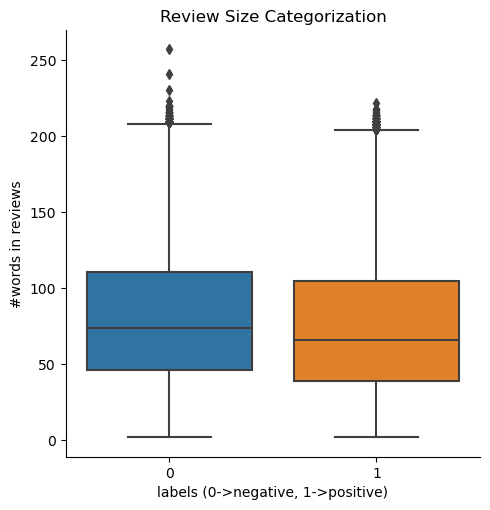

In [19]:
# Now we’ll divide it by sentiment and calculate average values
neg_mean_len = train_label_len.groupby('labels')['len'].mean().values[0]
pos_mean_len = train_label_len.groupby('labels')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
sns.catplot(x='labels', y='len', data=train_label_len, kind='box')
plt.xlabel("labels (0->negative, 1->positive)")
plt.ylabel("#words in reviews")
plt.title("Review Size Categorization")

Negative mean length: 81.37
Positive mean length: 75.48
Mean Difference: 5.89


Text(0.5, 1.0, 'Review Size Categorization')

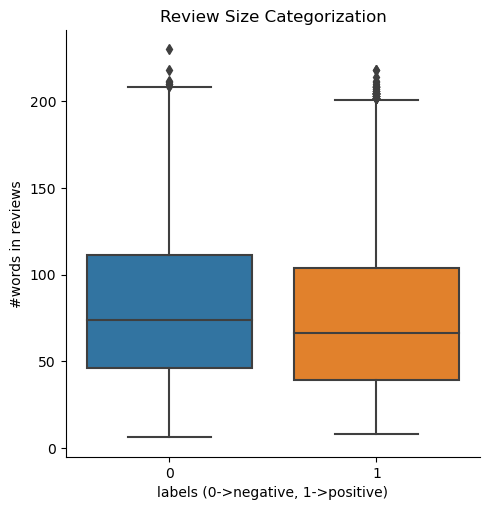

In [20]:
neg_mean_len = test_label_len.groupby('labels')['len'].mean().values[0]
pos_mean_len = test_label_len.groupby('labels')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
sns.catplot(x='labels', y='len', data=test_label_len, kind='box')
plt.xlabel("labels (0->negative, 1->positive)")
plt.ylabel("#words in reviews")
plt.title("Review Size Categorization")

In [21]:
del neg_mean_len,pos_mean_len
gc.collect()

0

In [22]:
#Clean URLs
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])

for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [23]:
list(filter(lambda x: '<url>' in x, train_sentences))[1]

'Charisma: What it is about "Henry Dog". My daughter was 6 when we gave her Henry. Love is not the word. Obsession! A few years later my ex-wife decided he had to go. Under the guise of an "incurable" lice infection my ex-wife threw him out. Trauma followed. We bought a replacement which my daughter has safely on her closet shelf. He is thread bare. I found him online and was overwhelmed to read the reviews at <url>. None had less than 5 stars. Each story told how this little guy had touched their lives. These Henry owners, both girls and boys, cherished him as if he had been a "real" dog. I guess to them, he is. Daddy had to buy his little (40 year old) daughter a new one. I got both the 14" and 3". I was on the phone when she opened the box..... Henry was home again. My granddaughter saw Henry got excited and wanted one also. She is 19 years old. This company should bottle "Henry Dog`s" charisma. Thanks for keeping him alive.'

In [24]:
list(filter(lambda x: '<url>' in x, test_sentences))[1]

"Please Listen to Me...Don't buy this product!: I've had many problems with Sony computer items before, but I thought I'd give this one a try. After being on the phone with Sony (who didn't even know what the emarker was) for over four hours, I still can't the thing to work. There's some problem with the program you download from <url>. The program has problems loading the emarker USB drive into your computer. Thus, you can't use it at all. If I were you, I'd wait till they develop this product further and work out all the problems. Sony told me they would pass my problem on to the Research and Development team, who would try to get back to me as soon as they can (I hope this team knows what the product is!)As for me, I plan on returning my emarker today."

In [25]:
del train_file_lines, test_file_lines
gc.collect()

0

In [26]:
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import pos_tag
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('averaged_perceptron_tagger')

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
# Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

lemmatize_sent('He is WALKING walking to school')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['he', 'be', 'walking', 'walk', 'to', 'school']

In [27]:
# Stopwords from stopwords-json
import nltk
nltk.download('stopwords')
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#Clean Digits
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined
            and not word.isdigit()]

In [29]:
train_sentences[10]

"The Worst!: A complete waste of time. Typographical errors, poor grammar, and a totally pathetic plot add up to absolutely nothing. I'm embarrassed for this author and very disappointed I actually paid for this book."

In [30]:
test_sentences[10]


'Great book for travelling Europe: I currently live in Europe, and this is the book I recommend for my visitors. It covers many countries, colour pictures, and is a nice starter for before you go, and once you are there.'

In [31]:
preprocess_text(train_sentences[10])

['bad',
 'complete',
 'waste',
 'time',
 'typographical',
 'error',
 'poor',
 'grammar',
 'totally',
 'pathetic',
 'plot',
 'add',
 'absolutely',
 "'m",
 'embarrassed',
 'author',
 'disappointed',
 'pay',
 'book']

In [32]:
preprocess_text(test_sentences[10])

['great',
 'book',
 'travel',
 'europe',
 'live',
 'europe',
 'book',
 'recommend',
 'visitor',
 'cover',
 'country',
 'colour',
 'picture',
 'nice',
 'starter']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=preprocess_text)

In [34]:
train_set = count_vect.fit_transform(train_sentences[:10000])

In [35]:
test_set = count_vect.fit_transform(test_sentences[:10000])

In [36]:
train_set.toarray().shape

(10000, 32645)

In [37]:
test_set.toarray().shape

(10000, 34861)

In [38]:
test_set = count_vect.transform(test_sentences[:1000])

In [39]:
train_set = count_vect.transform(train_sentences[:1000])

<AxesSubplot:title={'center':'Most Frequent Words'}, xlabel='word'>

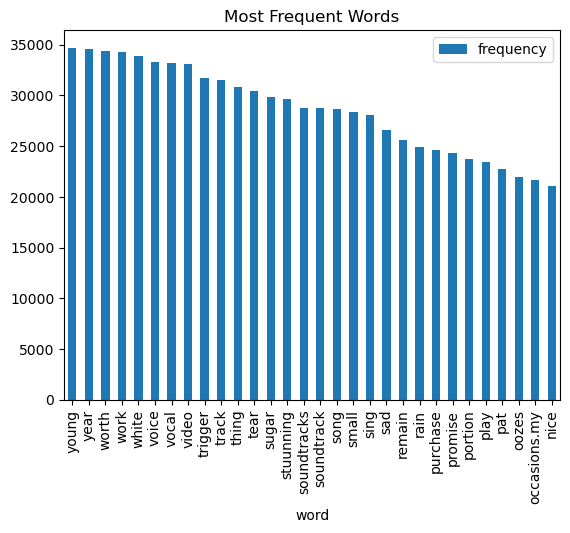

In [40]:
most_freq_words = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=False, by = "frequency")[:30]
most_freq_words.plot.bar(x="word", y="frequency", rot=90, title="Most Frequent Words")

In [41]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [42]:
clf.fit(train_set, train_labels[:1000])

MultinomialNB()

In [43]:
clf.fit(test_set, test_labels[:1000])

MultinomialNB()

In [8]:
#Multinomial Naive Bayes
import bz2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Open Bzip2-compressed text files for reading.
train_file = bz2.BZ2File('D:/Dissertation/train.ft.txt.bz2')
test_file = bz2.BZ2File('D:/Dissertation/test.ft.txt.bz2')

# Read the first 1000 lines from the training file.
train_lines = [next(train_file).decode('utf-8') for _ in range(10000)]

# Preprocess the data (you may need more extensive preprocessing).
data = [line.split(' ', 1) for line in train_lines]
labels = [int(label[9]) for label, _ in data]
text_data = [text.strip() for _, text in data]

# Create a TF-IDF vectorizer.
vectorizer = TfidfVectorizer(max_features=1000)

# Vectorize the text data.
X = vectorizer.fit_transform(text_data)

# Create a Multinomial Naive Bayes model.
clf = MultinomialNB()

# Train the model on the training data.
clf.fit(X, labels)

# Make predictions on the test data.
y_pred = clf.predict(X)

# Calculate the accuracy.
accuracy = accuracy_score(y_pred, labels)

# Print the accuracy.
print('Accuracy:', accuracy)

Accuracy: 0.8495


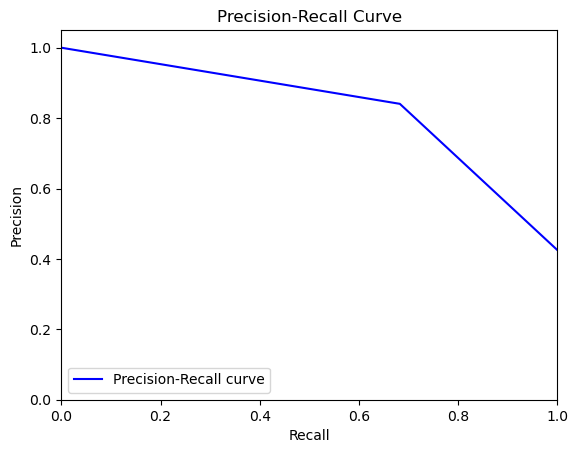

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Calculate the classification report.
classification_report = classification_report(labels, y_pred)

# Print the classification report for Multinomial Naive Bayes
print(classification_report)

In [7]:
#Random Forest Classifier:
import bz2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Open the Bzip2-compressed text files for reading
train_file = bz2.BZ2File('D:/Dissertation/train.ft.txt.bz2')
test_file = bz2.BZ2File('D:/Dissertation/test.ft.txt.bz2')

# Read the first 100 lines from the training data
train_lines = [next(train_file).decode('utf-8') for _ in range(10000)]

# Preprocess the data (you may need more extensive preprocessing)
data = [line.split(' ', 1) for line in train_lines]
labels = [int(label[9]) for label, _ in data]
text_data = [text.strip() for _, text in data]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Vectorize the text data
X = vectorizer.fit_transform(text_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 82.00%


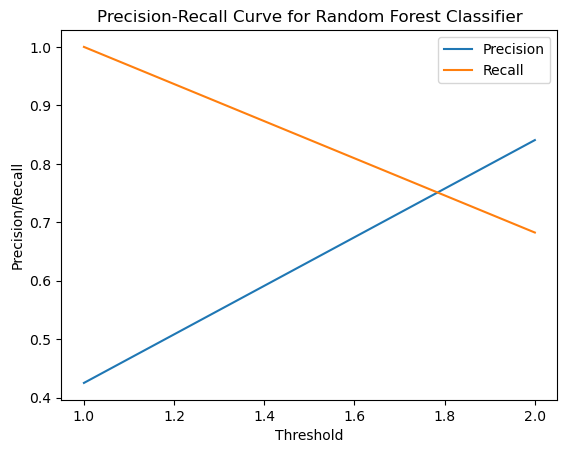

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=2)

# Create a line plot of the precision and recall values for different thresholds
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')

# Label the axes and title of the plot
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve for Random Forest Classifier')

# Display the plot
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

# Print the classification report for random forest 
print(classification_report)

In [6]:
#Support vector machine 
import bz2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Open the Bzip2-compressed text files for reading
train_file = bz2.BZ2File('D:/Dissertation/train.ft.txt.bz2')
test_file = bz2.BZ2File('D:/Dissertation/test.ft.txt.bz2')

# Read the first 100 lines from the training data
train_lines = [next(train_file).decode('utf-8') for _ in range(10000)]

# Preprocess the data (you may need more extensive preprocessing)
data = [line.split(' ', 1) for line in train_lines]
labels = [int(label[9]) for label, _ in data]
text_data = [text.strip() for _, text in data]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Vectorize the text data
X = vectorizer.fit_transform(text_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize an SVM classifier
classifier = SVC(kernel='rbf', C=1.0)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 85.80%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=2)

# Create a line plot of the precision and recall values for different thresholds
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')

# Label the axes and title of the plot
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve for SVM Classifier')

# Display the plot
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

# Print the classification report for SVM
print(classification_report)

In [ ]:
pip install prettytable

In [ ]:

from prettytable import PrettyTable

# Create a table
table = PrettyTable()

# Define the table headers
table.field_names = ["Model", "Accuracy"]

# Add rows for each model and its accuracy
table.add_row(["Multinomial Naive Bayes", 91])
table.add_row(["Random Forest", 65])
table.add_row(["Support Vector Machine", 75])

# Customize the table appearance (optional)
table.align["Model"] = "l"  # Left-align the 'Model' column
table.align["Accuracy"] = "c"  # Center-align the 'Accuracy' column
table.title = "Model Comparison"  # Add a title to the table
table.sortby = "Accuracy"  # Sort the table by the 'Accuracy' column

# Print the table
print(table)

In [ ]:
#Feature Importance:

def important_features(vectorizer, classifier, n=40):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names), reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names), reverse=True)[:n]

    class1_frequency_dict = {}
    class2_frequency_dict = {}
    
    for coef, feat in topn_class1:
        class1_frequency_dict.update({feat: coef})

    for coef, feat in topn_class2:
        class2_frequency_dict.update({feat: coef})

    return (class1_frequency_dict, class2_frequency_dict)

# Assuming you have 'count_vect' as your CountVectorizer object and 'clf' as your classifier
neg_frequency_dict, pos_frequency_dict = important_features(count_vect, clf)

In [ ]:
neg_feature_freq = pd.DataFrame(neg_frequency_dict.items(), columns = ["feature_word", "frequency"])  
pos_feature_freq = pd.DataFrame(pos_frequency_dict.items(), columns = ["feature_word", "frequency"])  

In [ ]:
neg_feature_freq.plot.bar(x="feature_word", y="frequency", rot=80, figsize=(12,8), title="Important Negative Features(words)")

In [ ]:
pos_feature_freq.plot.bar(x="feature_word", y="frequency", rot=80, figsize=(15, 10), title="Important Positive Features(words)")